In [1]:
using Plots, DelimitedFiles

# 1. epsilon-coupling 

# Plot $\Delta E$ and Hamming distance of the ground states

### data obtained with MF

In [13]:
namefile = "../run_epsilon_PF00397_mf_90.txt"
data_epsilon = readdlm(namefile);
param_epsilon = data_epsilon[1,:]

14-element Vector{Any}:
    90
      "PF00397"
    31
 59696
     5
     0.9
     0.001
     1.0e-10
      "random"
      "mf"
   700
     0.9
    30
     0.02

In [14]:
neps = sum(typeof.(data_epsilon[2,:]) .== Float64)
res_epsilon = data_epsilon[2:end,1:neps];
epsilons = res_epsilon[1,:]

μΔEs = res_epsilon[2,:]
σΔEs = res_epsilon[3,:]
μdist = res_epsilon[6,:]
σdist = res_epsilon[7,:];

### data obtained with SCE

In [15]:
namefile = "../run_epsilon_PF00397_sce_50_betafixed.txt"
data_epsilon = readdlm(namefile);
param_epsilon = data_epsilon[1,:]

12-element Vector{Any}:
    50
      "PF00397"
    31
 59696
     5
     0.9
     0.001
     1.0e-10
      "random"
      "sce"
  2000
     0.5

In [16]:
neps = sum(typeof.(data_epsilon[2,:]) .== Float64)
res_epsilon = data_epsilon[2:end,1:neps];

epsilons_sce = res_epsilon[1,:]
μΔEs_sce = res_epsilon[2,:]
σΔEs_sce = res_epsilon[3,:]
μdist_sce = res_epsilon[6,:]
σdist_sce = res_epsilon[7,:];

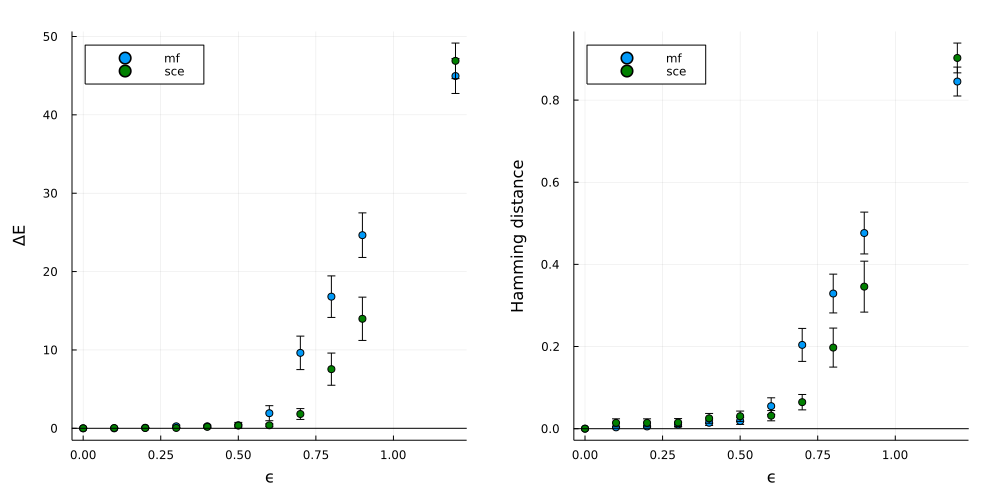

In [42]:
tiny = 0
pΔ = scatter(-epsilons.+tiny, μΔEs.+tiny, yerr=σΔEs, label="mf", legend=:topleft)
scatter!(-epsilons_sce, μΔEs_sce,  yerr=σΔEs_sce, label="sce", legend=:topleft, color="green")
xlabel!("ϵ")
ylabel!("ΔE")
hline!([0.0], label="", color="black")

pdist = scatter(-epsilons.+tiny, μdist.+tiny, yerr=σdist, label="mf", legend=:topleft)
scatter!(-epsilons_sce.+tiny, μdist_sce.+tiny, yerr=σdist_sce, label="sce", legend=:topleft, color="green")
hline!([0.0], label="", color="black")
xlabel!("ϵ")
ylabel!("Hamming distance")
plot(pΔ, pdist, size=(1000,500), margin=6*Plots.mm)


In [43]:
savefig("epsilon_PF00397.pdf")

# Plot at fixed $\beta$ of thermodynamic quantities

### data obtained with SCE

In [37]:
namefile = "../run_epsilon_PF00397_sce_50_betafixed.txt"
data_epsilon = readdlm(namefile);
param_epsilon = data_epsilon[1,:]

12-element Vector{Any}:
    50
      "PF00397"
    31
 59696
     5
     0.9
     0.001
     1.0e-10
      "random"
      "sce"
  2000
     0.5

In [38]:
neps = sum(typeof.(data_epsilon[2,:]) .== Float64)
res_epsilon = data_epsilon[2:end,1:neps];

epsilons_sce = res_epsilon[1,:]
μΔEs_sce = res_epsilon[2,:]
σΔEs_sce = res_epsilon[3,:]
μdist_sce = res_epsilon[6,:]
σdist_sce = res_epsilon[7,:];

In [39]:
μE = res_epsilon[8,:]
σE = res_epsilon[9,:]
μU = res_epsilon[10,:]
σU = res_epsilon[11,:]
μS = res_epsilon[12,:]
σS = res_epsilon[13,:];


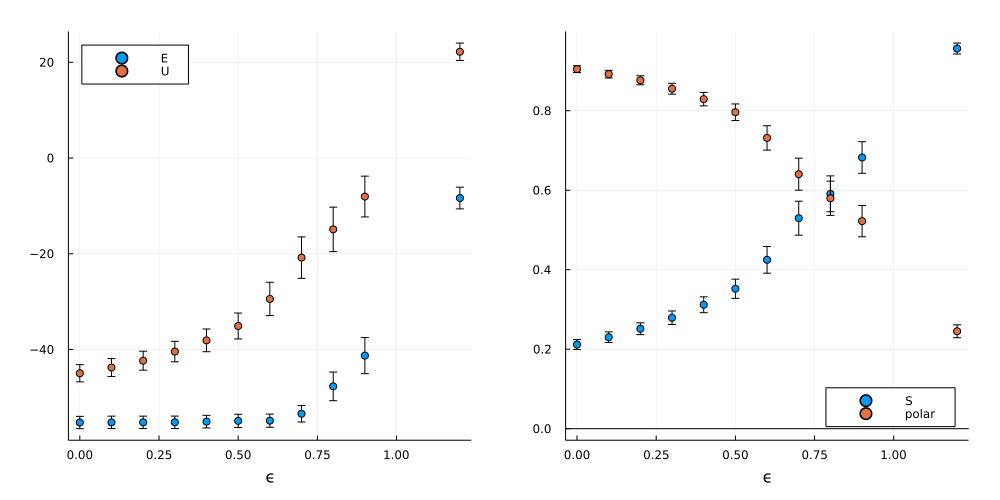

In [44]:
pu = scatter(-epsilons, μE, yerr=σE, label="E", legend=:topleft)
scatter!(-epsilons, μU, yerr=σU, label="U")
xlabel!("ϵ")
ps = scatter(-epsilons, μS, yerr=σS, label="S", legend=:topleft)
scatter!(-epsilons, μpolars, yerr=σpolars, label="polar", legend=:bottomright)
xlabel!("ϵ")
hline!([0.0], label="", color="black")
plot(pu, ps, size=(1000,500), margin=6*Plots.mm)

In [45]:
savefig("epsilon_PF00397_thqs.pdf")